# Tecnológico de Costa Rica
## Programa de Ciencia de Datos
### Prof. Felipe Meza Obando,

#### Aprendizaje automático (4B)
#### Tarea-3

--- 
Medio de entrega: Link de GitHub

Entregables: Un archivo jupyter ( .IPYNB ). 

Modo de trabajo: Parejas:
Estudiantes:

Yu Hung Yeh Chai

José Alberto Raygada Agüero

---

El objetivo de la Tarea 3 consiste en elegir un conjunto de datos de mediana complejidad que no sea trivial (es decir, que permita alcanzar las actividades de la tarea), y aplicarle algunos algoritmos supervisados de su elección, de la siguiente forma:

---

# 1. Investigar sobre las métricas para evaluación de los modelos de aprendizaje supervisado, tanto para clasificación como para regresión, debe explicar el detalle de cada métrica y plantear un ejemplo de cada una, según sea el caso.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns

#Funciones
def bold(t):
    """
    Funcion para formatear en negrita el texto.
    t = cualquier dato
    """
    return "\033[1m" + str(t) + "\033[0m"

def newline():
    """
    Funcion para imprimir cambio de linea
    """
    print("\r\n")
    
def titulo(t):
    """
    Funcion para imprimir titulo formateado.
    t = titulo
    """
    print(bold(t))
    print("----------------------------------------------")
    newline()
    

## Métricas de evaluación de clasificación

### Matriz de confusión

La idea general de la ***Matriz de confusión*** es contar el número de veces que las instancias de la **clase A** son clasificados como **clase B**. Para computar la ***Matriz de confusión*** se requiere tener primero un conjunto de predicciones de tal forma que pueda ser comparado con el target real. Como resultado de la aplicación de esta técnica se obtiene una matriz en la que cada fila representa los datos reales de cada clase, mientras que las columnas representan la  predicción de cada clase, teniendo como componentes en cada caso negativos y positivos respectivamente. Así, la primera casilla de la primera fila representará los negativos verdaderos (***true negatives***) y la de las segunda casilla de esa primera fila los falsos positivos (***false positives***); la primera casilla de la segunda fila muestra los falsos negativos (***false negatives***) y finalmente la segunda casilla de esa última fila representa los positivos verdaderos (***true positives***).

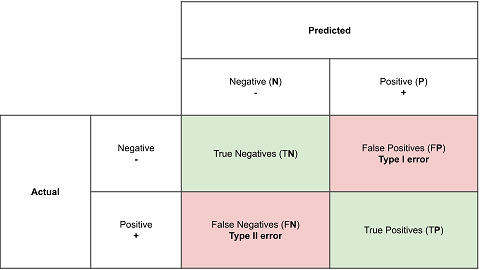

In [2]:
from IPython.display import Image
Image("confusion_matrix.png")

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape # 70 mil imágenes y 784 features (28 x 28 pixels), each pixel = intensity from 0 (white) to 255 (black)

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y[0]

'5'

In [7]:
y = y.astype(np.uint8) # Convierte la información de strings a números (integer)

In [8]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:] # Training set = 60,000, test set = 10,000

In [9]:
# Para simplificar, se escoge únicamente un dígito, el 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier # Se escoge como clasificador el Stochastic Gradient Descent (SGD)

sgd_clf = SGDClassifier(random_state=42) # Se escoge el parámetro 42 para obtener resultados reproducibles
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# Aplicación de la métrica de Confusion Matrix
# Primero se debe contar con el set de predicciones para poder comparar con el target real
# Se utiliza para el ejemplo la función cross_val_predict

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[5375,  111],
       [ 120,  394]], dtype=int64)

El resultado de la matriz nos indica que tenemos 5,375 casos correctamente clasificados como que no son el número 5 (**true negatives TN**), mientras que los restantes 111 fueron erróneamente clasificados como números 5 (**false positives FP**). La segunda fila considera las imágenes reales del número 5 (**positive class**) de las cuales 120 fueron erróneamente clasificadas como que no eran números 5 (**false negatives FN**) y los restantes 394 fueron correctamente identificados con el número 5 (**true positives TP**).

Un clasificador perfecto daría como resultado una matriz que contendría únicamente true positives y true negatives, con valores diferentes a cero (**nonzero**) únicamente en su diagonal principal (la que va del extremo superior izquierdo al inferior derecho).

In [13]:
# Ejemplo de una matriz de confución con un clasificador perfecto:

y_train_perfect_predictions = y_train_5 # Simula que se alcanzó la perfección
confusion = confusion_matrix(y_train_5, y_train_perfect_predictions)
titulo("Confusion matrix - Con clasificador perfecto")
print(confusion)

Confusion matrix - Con clasificador perfecto
----------------------------------------------


[[5486    0]
 [   0  514]]


La **matriz de confución** genera bastante información pero frecuentemente se requiere contar con métricas más concisas, lo cual podemos obtener estableciendo relaciones con el resultado de los diferentes cuadrantes, como por ejemplo:

**Métrica de exactitud (Accuracy)**

La métrica **Accuracy** es el número de predicciones correctas (TP y TN) dividido por el número de todas las muestras:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$




In [14]:
# Ejemplo de la aplicación de la métrica de exactitud (accuracy)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_5, y_train_pred)
titulo("Métrica Exactitud")
print(accuracy)

Métrica Exactitud
----------------------------------------------


0.9615


**Métrica de precisión (Precision)**

La métrica **Precision** mide cuántas de las muestras pronosticadas como positivas son realmente positivas; es generalmente utilizada como una medida de desempeño cuando el objetivo es limitar el número de falsos positivos (por ejemplo en las pruebas de fármacos, que son test muy onerosos y por lo tanto se requiere de mucha precisión). También se conoce como **positive predictive value (PPV)**:

$$Precision =\frac{TP}{TP + FP}$$

In [15]:
# Ejemplo de la aplicación de la métrica de precision

from sklearn.metrics import precision_score

precision = precision_score(y_train_5, y_train_pred)
titulo("Métrica Precision")
print(precision)

Métrica Precision
----------------------------------------------


0.7801980198019802



**Métrica de exhaustividad (Recall)**

La métrica **Recall** mide cuántas de las muestras positivas fueron cubiertas por las predicciones positivas; es usada como métrica de desempeño cuando se necesita identificar todas las muestras positivas, es decir, cuando es importante evitar los falsos negativos (por ejemplo en la detección de enfermedades, donde es importante identificar a todas las personas que estén enfermas). También se conoce con los nombres de sensitivity, hit rate o **true positive rate (TPR)**:

$$Recall =\frac{TP}{TP + FN}$$


In [16]:
# Ejemplo de la aplicación de la métrica de recall

from sklearn.metrics import recall_score

recall = recall_score(y_train_5, y_train_pred)
titulo("Métrica Recall")
print(recall)

Métrica Recall
----------------------------------------------


0.7665369649805448


_____
**Referencias:**

***Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron.*** 2019, second edition. Prepare the Data for Machine Learning Algorithms, Feature Scaling, pág. 90.

***Introduction to Machine Learning with Python. Andreas C. Müller.*** 2017, Third edition. Evaluation Metrics and Scoring, pág. 289-290.
_____

## Métricas de evaluación de regresión


### Error medio absoluto

Esta métrica de regresión es el valor medio de la diferencia absoluta entre el valor real y el valor predicho.  Entre menor el numero más exacto es.


**Formula:**

$$MAE=\frac{1}{n} \sum_{i=1}^{n} \left\lvert{real_{i} - predicho_{i}}\right\rvert$$


**Ejemplo:**

In [17]:
Actual = np.array([2,3,4,5,6,7,8,9])
Forecast = np.array([1,3,5,4,6,7,10,7])

El siguiente código muestra cómo calcular el error medio absoluto para este modelo:

In [18]:
print(bold("Resultado MAE = "), mean_absolute_error(Actual, Forecast))

Resultado MAE =  0.875


### Error cuadrático medio (ECM)

El error cuadrático medio (ECM) calcula el valor medio de la diferencia al cuadrado entre el valor real y el predicho para todos los puntos de datos. Todos los valores relacionados se elevan a la segunda potencia, por lo tanto, todos los valores negativos no se compensan con los positivos. Además, debido a las características de esta métrica, el impacto de los errores es mayor. Por ejemplo, si el error en nuestros cálculos iniciales es de 1/2/3, el ECM será igual a 1/4/9 respectivamente. Cuanto menor sea el ECM, más precisas serán nuestras predicciones. ECM = 1 es el punto óptimo en el que nuestro pronóstico es perfectamente preciso.

El ECM tiene algunas ventajas frente al EMA:

1. El ECM destaca grandes errores entre los pequeños.
2. El ECM es diferenciable, lo que ayuda a encontrar los valores mínimos y máximos utilizando los métodos matemáticos de manera más efectiva.

**Formula:**

$$ECM=\frac{1}{n} \sum_{i=1}^{n} (real_{i} - predicho_{i})^{2}$$


**Ejemplo:**

Utilizando los mismos datos anteriores Actual y Forecast, se muestra el siguiente codigo ejemplo el calculo ECM.

In [19]:
print(bold("Resultado ECM = "), mean_squared_error(Actual, Forecast))

Resultado ECM =  1.375


## Raíz del error cuadrático medio (RECM)

El RECM es la raíz cuadrada del ECM. Es fácil de interpretar en comparación con el ECM y utiliza valores absolutos más pequeños, lo que es útil para los cálculos informáticos.

**Formula:**

$$RECM = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (real_{i} - predicho_{i})^{2}}$$


**Ejemplo:**

Utilizando los mismos datos anteriores Actual y Forecast, se muestra el siguiente codigo ejemplo el calculo RECM.

In [20]:
print(bold("Resultado RECM = "), sqrt(mean_squared_error(Actual, Forecast)))

Resultado RECM =  1.1726039399558574


_____
**Referencias:**

***Selección de métricas para aprendizaje automático*** https://urldefense.com/v3/__https://fayrix.com/machine-learning-metrics_es__;!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b37nFKAN5I$ 

# 2. Elegir el dataset trazar la estrategia del problema basado en su naturaleza (regresión o clasificación).

# 3. De ser necesario un pre-procesado, debe llevarlo a cabo

Trabajaremos con los datos de estadísticas de videos Trending de videos de USA de Youtube porque nos parece un data set interesesante y de moda e intentaremos crear un modelo de predicción para las categorías de los videos basados en sus atributos.  Este data set es tomado de https://urldefense.com/v3/__https://www.kaggle.com/datasnaek/youtube-new*5Cn__;JQ!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b374yzol3A$ 
## ¿En qué consiste y por qué es necesario realizar el procesado de nuestro dataset?

Un sistema de Apredizaje Automático (Machine Learning, ML) no es capaz de reconocer lo que en idioma inglés se conoce como gibberish, que son todos aquellos signos, símbolos o lenguaje en general que no posee un sentido claro y que puede incluir sonidos del habla que no son palabras reales, juegos de lenguaje y jerga especializada que parece absurda para los no especialistas; por tal motivo muy frecuentemente se requiere limpiar nuestro dataset antes de poder aplicar nuestros algoritmos de ML.

## Exploración inicial de los datos

Para decidir cómo limpiar nuestros datos necesitamos estar familiarizados con los mismos. Para tal efecto podemos realizar dos tareas que no son mutuamente excluyentes: primero, escanear los datos y segundo, visualizar la data; esto depende del tipo de datos que estemos manejando, lo más frecuente es que trabajemos con una matriz numérica pero podría tratarse de dataos de imágenes, audio, texto u otro tipo de información.

Lo que deseamos conocer es si la base de datos posee **valores faltantes (missing values)**, cómo se encuentran distribuidos los valores y qué tipo de **características (features)** presenta. 

### Manejo de los valores faltantes

Muy frecuentemente se carecerá de valores para ciertas características. Esto puede ocurrir por varias razones, como que sea inconveniente, muy oneroso o a veces imposible encontrar un valor en particular.

La primera respuesta cuando nos encontramos ante valores faltantes es ignorarlos, sin embargo, como se mencionó antes, algunos algoritmos no podrán funcionar con datos incompletos o bien, los resultados podrían no ser precisos.

La segunda solución es sustituir los valores faltantes con un valor fijo - esta técnica se denomina **imputar (imputing)**; podríamos imputar **la media aritmética (mean), la mediana (median) o la moda (mode)** de los valores válidos para una determinada característica. Idealmente deberíamos contar con un conocimiento previo que sea lo suficientemente confiable. 

_____
**Referencias:**

***Python Machine Learning By Example by Yuxi (Hayden) Liu.*** 2020, Third edition. Preprocessing and exploration, pág. 26.

Se procede con la carga de datos de estadísticas de videos Trending de videos de USA de Youtube.

In [21]:
df = pd.read_csv(r"usvideos.csv")

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Una de las primeras tareas que debemos aplicar es la identificación de datos no numéricos (NaN)

In [22]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Se dectectó que la columna "description" es la única que contiene NaN's pero es columna de texto y sin categorías que no agrega valor en el modelo de análisis de Machine Learning, por lo que se va a eliminar esta columna.

In [23]:
df.drop('description', axis='columns', inplace=True)
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

In [24]:
# Detalle de columnas originales

df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

El siguiente proceso a seguir es la eliminación de todas aquellas columnas que no representan datos numéricos o categorías y por lo tanto no son relevantes para el modelo de ML.

In [25]:
df = df.drop(columns = ['video_id','trending_date','title','channel_title','publish_time','tags','thumbnail_link'])
df.columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

Seguidamente se debe hacer otra revisión de los datos para identificar que otro preprocesamiento de datos se requiere:

In [26]:
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,False,False,False
1,24,2418783,97185,6146,12703,False,False,False
2,23,3191434,146033,5339,8181,False,False,False
3,24,343168,10172,666,2146,False,False,False
4,24,2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,False,False,False
40945,22,1064798,60008,382,3936,False,False,False
40946,24,1066451,48068,1032,3992,False,False,False
40947,1,5660813,192957,2846,13088,False,False,False


Se nota que las últimas tres columnas muestran valores False y True que deben ser sustituidos por 0 y 1 respectivamente que son valores numéricos que si podemos utilizar en los algoritmos de ML.

In [27]:
df.replace(to_replace=False, value = 0, inplace = True)
df.replace(to_replace=True, value = 1, inplace = True)
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,0,0,0
1,24,2418783,97185,6146,12703,0,0,0
2,23,3191434,146033,5339,8181,0,0,0
3,24,343168,10172,666,2146,0,0,0
4,24,2095731,132235,1989,17518,0,0,0
...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,0,0,0
40945,22,1064798,60008,382,3936,0,0,0
40946,24,1066451,48068,1032,3992,0,0,0
40947,1,5660813,192957,2846,13088,0,0,0


Una vez que la base de datos se ha depurado con los pasos anteriores se procede a aplicar técnicas de visualización de los datos.

Ploteo de Views versus Likes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='views'>

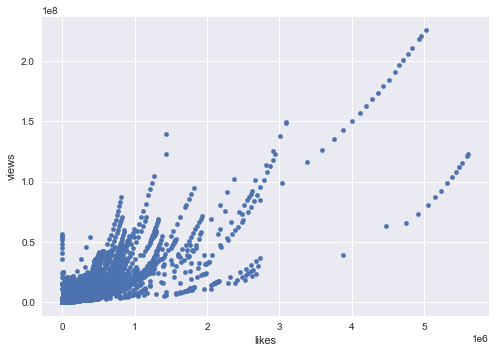

In [28]:
titulo("Ploteo de Views versus Likes")

matplotlib.style.use('seaborn')

df.plot.scatter(x='likes', y='views')


Basado en el gráfico de dispersión anterior podemos concluir que las variables de likes y Views presentan una alta correlación positiva.

Ploteo de Likes versus Dislikes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='dislikes'>

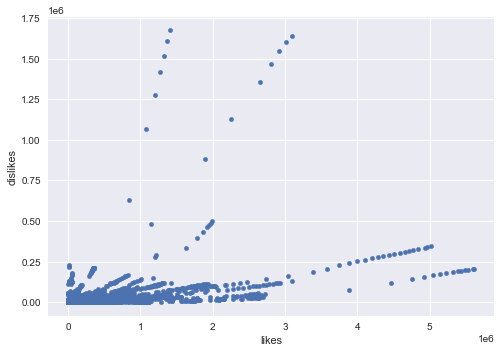

In [29]:
titulo("Ploteo de Likes versus Dislikes")

matplotlib.style.use('seaborn')

df.plot.scatter(x='likes', y='dislikes')


## Separacion de target y features

Antes de normalizar y estandarizar procedemos a separar features y target.

In [30]:
target = df[['category_id']]
features = df.iloc[:,1:8]

## Normalización y estandarización (Feature Scaling)

Una de las transformaciones más importantes que deben ser aplicadas a los datos es el escalamiento de características (feature scaling). En la mayoría de los casos, los algorítmos de aprendizaje automático no se desempeñan bien cuando la entrada de atributos numéricos presentan diferentes escalas. Existen dos formas comunes para conseguir que todos los datos de los atributos tengan la misma escala:

1. **Normalización (min-max scaling)**: es la más simple; los valores son cambiados y re-escalados de tal forma que se presenten en un rango de 0 a 1. Lo anterior se logra restando el valor mínimo y dividiendo por el máximo menos el mínimo. 

$$Scaler(x_i)=\frac{x_i-min(x)}{max(x) - min(x)}$$

      
2. **Estandarización:** La estandarización requiere primero restar el valor medio (mean value ${\mu}$), por lo tanto los valores estandarizados siempre presentan una media igual a cero, y después dividir por la desviación estandar (standard deviation ${\sigma}$), de tal forma que la distribución resultante presentará varianza igual a 1.


$$Scaler(x_i)=\frac{x_i-\mu}{\sigma}$$



_____
**Referencias:**

***Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron.*** 2019, second edition. Prepare the Data for Machine Learning Algorithms, Feature Scaling, pág. 69-70.

### Normalización y estandarización

In [31]:
titulo("Resultado de la normalización y estandarización")

scaler = MinMaxScaler()
nombreColumnas = features.columns.to_numpy()
datosNormalizadosEstandarizados = pd.DataFrame(scaler.fit_transform(features), columns = nombreColumnas)

print(datosNormalizadosEstandarizados)

Resultado de la normalización y estandarización
----------------------------------------------


          views     likes  dislikes  comment_count  comments_disabled  \
0      0.003321  0.010247  0.001771       0.011717                0.0   
1      0.010738  0.017312  0.003671       0.009330                0.0   
2      0.014168  0.026013  0.003189       0.006008                0.0   
3      0.001521  0.001812  0.000398       0.001576                0.0   
4      0.009303  0.023555  0.001188       0.012866                0.0   
...         ...       ...       ...            ...                ...   
40944  0.007482  0.006798  0.000827       0.001951                0.0   
40945  0.004726  0.010689  0.000228       0.002891                0.0   
40946  0.004733  0.008562  0.000616       0.002932                0.0   
40947  0.025133  0.034372  0.001700       0.009612                0.0   
40948  0.045760  0.063607  0.127194       0.106343                0.0   

       ratings_disabled  v

Una vez normalizada y estandarizada la data procedemos a plotear de nuevo la información para poder comparar los resultados:

Ploteo de Views versus Likes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='views'>

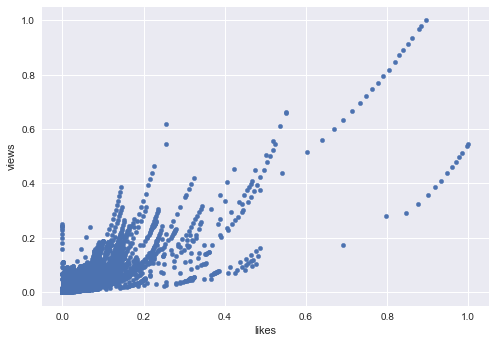

In [32]:
titulo("Ploteo de Views versus Likes")

matplotlib.style.use('seaborn')

datosNormalizadosEstandarizados.plot.scatter(x='likes', y='views')

Ploteo de Likes versus Dislikes
----------------------------------------------




<AxesSubplot:xlabel='likes', ylabel='dislikes'>

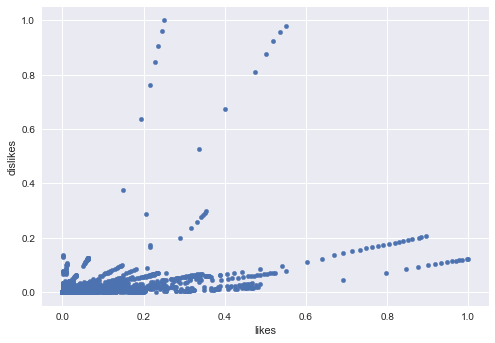

In [33]:
titulo("Ploteo de Likes versus Dislikes")

matplotlib.style.use('seaborn')

datosNormalizadosEstandarizados.plot.scatter(x='likes', y='dislikes')

Se puede concluir que se normalizó y estandarizó correctamente ya que se mantuvo la misma tendencia en ambos gráfico, con la única diferencia de la escala, que ahora es mucho menor que antes.

# 4. Aplicar 3 métodos de su elección de los vistos en clase, creando una estrategia de modicación de los hiper-parámetros para mejora del modelo, elección de features óptimos y elaborar un análisis completo de los resultados obtenidos.


# 6. Para los puntos 4 y 5, debe de recurrir a las métricas que investigó en el punto 1.

# 7. No olvide el análisis científico que se espera de esta tarea, justique en todo momento los resultados y haga un buen uso de la Notebook.

Se utilizará cuatro algoritmos diferentes de machine learning de clasificación para resolver el problema de predecir a cual categoría pertenece un video basado en su set de atributos.  Vamos a usar el mismo set de datos que ya se normalizó y estandarizó.

## Separación de datos de prueba y entrenamiento

Se procede a separar los datos de prueba y entrenamiento.

In [34]:
featuresNormalizadsEstandarizados = datosNormalizadosEstandarizados.iloc[:,0:8]

x_train, x_test, y_train, y_test = train_test_split(featuresNormalizadsEstandarizados, target, random_state=4)

titulo("Features")
print("Features Original", featuresNormalizadsEstandarizados.shape)
print("Features Train", x_train.shape)
print("Features Test", x_test.shape)

newline()

titulo("Target")
print("Target Original", df['category_id'].shape)
print("Target Train", y_train.shape)
print("Target Test", y_test.shape)

Features
----------------------------------------------


Features Original (40949, 7)
Features Train (30711, 7)
Features Test (10238, 7)


Target
----------------------------------------------


Target Original (40949,)
Target Train (30711, 1)
Target Test (10238, 1)


## Algoritmo kNN

Procederemos a usar el algoritmo kNN para crear modelo de predicción.  Se definine la cantidad de vecinos.  Empezamos con 3 vecinos.

### 4 vecinos

In [35]:
n_neighbors4 = 4
knn_model4 = KNeighborsRegressor(n_neighbors4)
knn_model4.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

Se evalua el error de predicción sobre los datos de entrenamiento y prueba usando RECM.

In [36]:
train_preds4 = knn_model4.predict(x_train)
mse4 = mean_squared_error(y_train, train_preds4)
rmse4 = sqrt(mse4)
print(bold("RECM Training"), rmse4)

test_preds4 = knn_model4.predict(x_test)
test_mse4 = mean_squared_error(y_test, test_preds4)
test_rmse4 = sqrt(test_mse4)
print(bold("RECM Prueba"), test_rmse4)

RECM Training 4.584301791288834
RECM Prueba 6.05571034308346


### 3 vecinos

Ahora probaremos con 3 vecinos.

In [37]:
n_neighbors3 = 3
knn_model3 = KNeighborsRegressor(n_neighbors3)
knn_model3.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Se evalua el error de predicción sobre los datos de entrenamiento y prueba usando RECM.

In [38]:
train_preds3 = knn_model3.predict(x_train)
mse3 = mean_squared_error(y_train, train_preds3)
rmse3 = sqrt(mse3)
print(bold("RECM Training"), rmse3)

test_preds3 = knn_model3.predict(x_test)
test_mse3 = mean_squared_error(y_test, test_preds3)
test_rmse3 = sqrt(test_mse3)
print(bold("RECM Prueba"), test_rmse3)

RECM Training 4.132301053503635
RECM Prueba 6.041676574529378


### 2 vecinos

Ahora probaremos con 2 vecinos.

In [39]:
n_neighbors2 = 2
knn_model2 = KNeighborsRegressor(n_neighbors2)
knn_model2.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

Se evalua el error de predicción sobre los datos de entrenamiento y prueba usando RECM.

In [40]:
train_preds2 = knn_model2.predict(x_train)
mse2 = mean_squared_error(y_train, train_preds2)
rmse2 = sqrt(mse2)
print(bold("RECM Training"), rmse2)

test_preds2 = knn_model2.predict(x_test)
test_mse2 = mean_squared_error(y_test, test_preds2)
test_rmse2 = sqrt(test_mse2)
print(bold("RECM Prueba"), test_rmse2)

RECM Training 3.390544412073655
RECM Prueba 6.164738817534422


Con 2 vecinos no vemos que haya un mayor acercamiento de ambas metricas.  Podemos concluir la mejor opcion para este modelo es con 3 vecinos.

Visualizamos las columnas de views (eje x) y likes (eje y) siendo lo más relevantes del set de datos de prueba, y la escala de color son las categorías.

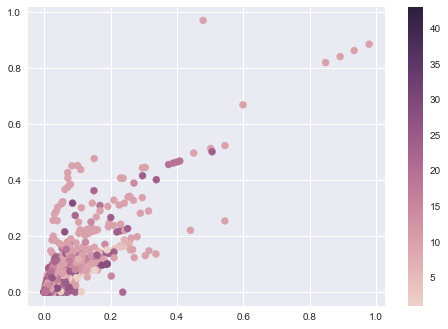

In [41]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=test_preds3, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Algoritmo de árboles de decisión

Definimos nuestros datos de características (features) y el target:

In [42]:
features = datosNormalizadosEstandarizados[['likes','dislikes','comment_count']]
features.head()

,likes,dislikes,comment_count
0,0.010247,0.001771,0.011717
1,0.017312,0.003671,0.009330
2,0.026013,0.003189,0.006008
3,0.001812,0.000398,0.001576
4,0.023555,0.001188,0.012866


In [43]:
target = df[['category_id']]
target.head()

,category_id
0,22
1,24
2,23
3,24
4,24


Realizamos el split de datos de training y testing:

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=7)

Construimos el clasificador de Decission Tree con una profundidad máxima de 2:

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2)

Entrenamos nuestro clasificador con los datos de features y target:

In [46]:
dt_clf = dt_clf.fit(X_train, y_train)

Visualizamos nuestro árbol de decisión entrenado mediante la herramienta Graphviz: https://urldefense.com/v3/__https://graphviz.org/__;!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b3759R-6vk$ 

In [47]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt_clf, 
    out_file='usvideos_tree.dot', 
    feature_names=features.columns, 
    class_names=["1","2","10","15","17","19","20","22","23","24","25","26","27","28","29","43"], 
    rounded=True, 
    filled=True)

Se convierte el archivo .dot a .png (o con la siguiente línea de código en el command-line: dot -Tpng usvideos_tree.dot -o usvideos_tree.png) y lo visualizamos:

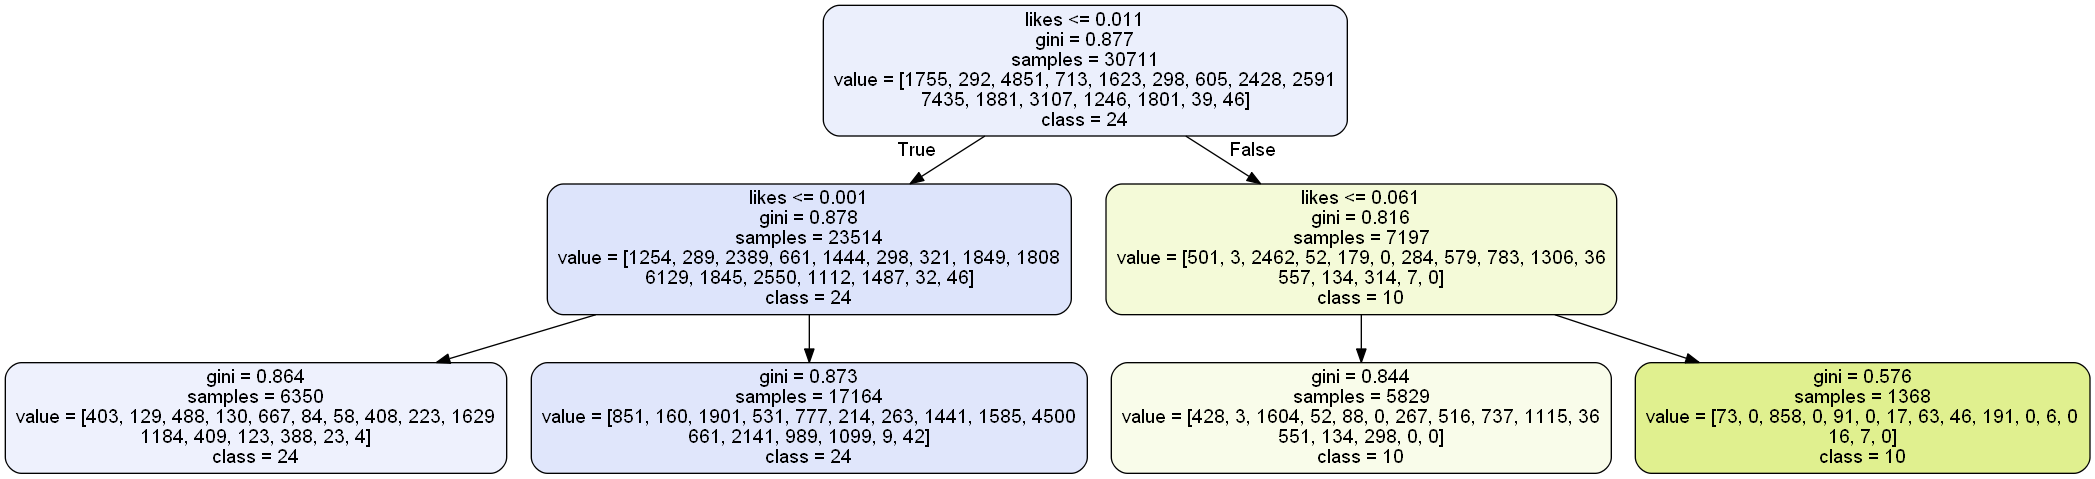

In [48]:
#from subprocess import call
#call(['dot','-T, 'png','usvideos_tree.dot','-o','usvideos_tree.png'])

Image("usvideos_tree.png")

Ahora procedemos ha evaluar la efectividad de la predicción con nuestro modelo de Árbol de decisión utilizando la métrica de accuracy:

In [49]:
y_predict = dt_clf.predict(X_test)

dt1 = accuracy_score(y_test, y_predict)
dt1

0.284430552842352

Ahora procedemos a evaluar el modelo de árbol de decisión con una profundidad de 3:

In [50]:
dt_clf2 = DecisionTreeClassifier(max_depth=3)

dt_clf2 = dt_clf2.fit(X_train, y_train)

In [51]:
# Visualizamos el nuevo árbol

export_graphviz(
    dt_clf2, 
    out_file='usvideos_tree2.dot', 
    feature_names=features.columns, 
    class_names=["1","2","10","15","17","19","20","22","23","24","25","26","27","28","29","43"], 
    rounded=True, 
    filled=True)

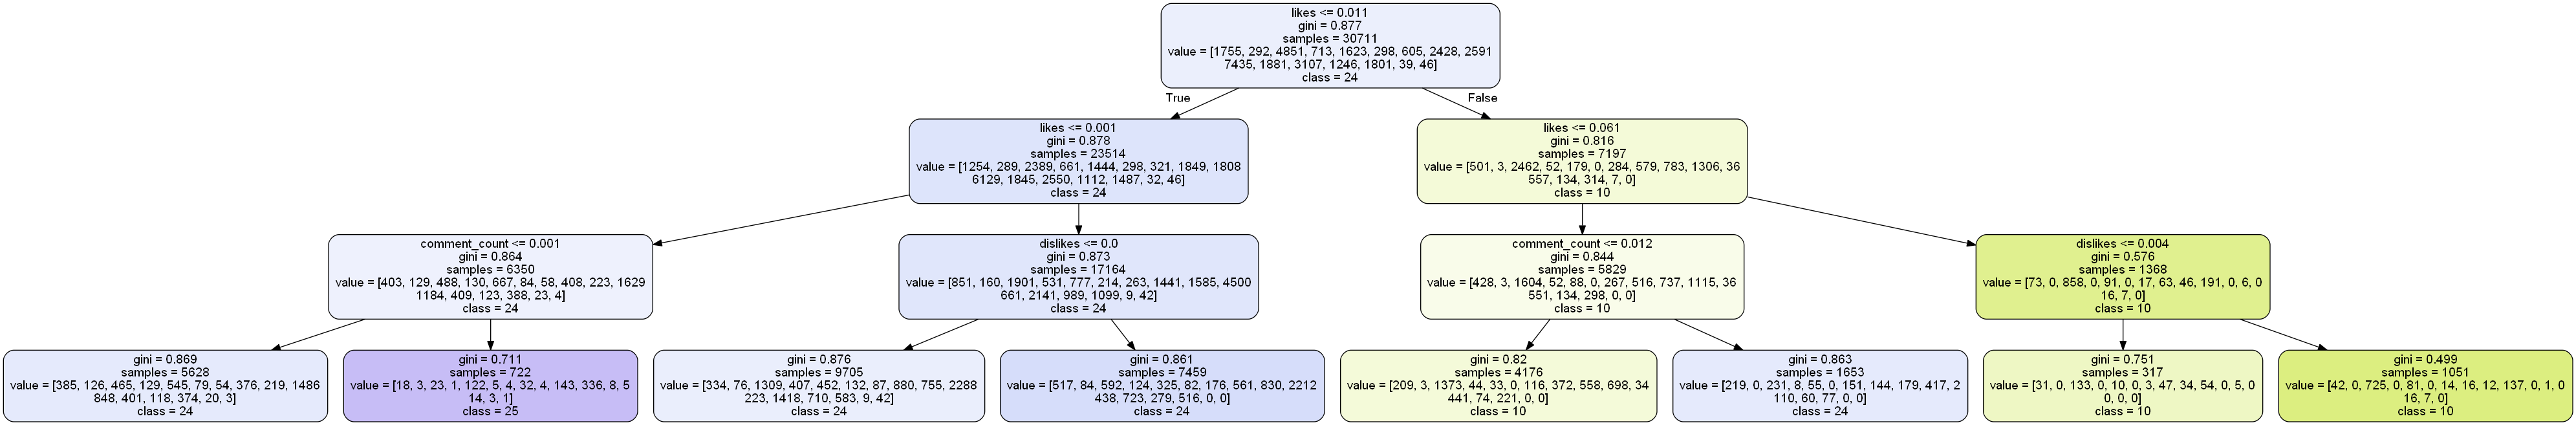

In [52]:
Image("usvideos_tree2.png")

In [53]:
y_predict2 = dt_clf2.predict(X_test)

dt2 = accuracy_score(y_test, y_predict2)
dt2

0.2908771244383669

Observamos una mejoría en la métrica de evaluación con este cambio de profundidad deñ 2 a 3.

In [54]:
export_graphviz(
    dt_clf, 
    out_file='usvideos_tree2.dot', 
    feature_names=features.columns, 
    class_names=["1","2","10","15","17","19","20","22","23","24","25","26","27","28","29","43"], 
    rounded=True, 
    filled=True)


## Algoritmo Naive Bayes

Los clasificadores del algoritmo de Naive Bayes se basan en el teorema de Bayes, el cual es una ecuación que describe la relación de probabilidades condicionales de cifras estadísticas. La idea de este tipo de clasificación es encontrar la probabilidad de una etiqueta (label) dadas las características observadas (features), que se expresa como **P(L | features)**, que el teorema de Bayes expresa de la siguiente forma:

$$ P(L | features) = \frac{P(features | L) P(L)}{P(features)} $$

Debido a que el modelo se complica entre más etiquetas contenga nuestra base de datos (**Generative model**), se requiere un simplificador de los supuestos considerados (de lo cual procede la denominación "Naive" o ingenuo). Para el ejemplo a desarrollar sobre la base de datos "usvideos.csv", aplicaremos el conjunto de supuestos del algoritmo **Gaussian naive Bayes** (que supone que los datos están representados por una distribución Gausiana o normal).

In [55]:
# Se definen los valores de X (features) y (labels)

features = datosNormalizadosEstandarizados[['likes','dislikes','comment_count']]
labels = df[['category_id']]

# Procedemos a realizar la redistribución de nuestros datos en los sets de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=7)

Implementamos el clasificador GaussinNB de la librería sklearn y entrenamos el modelo con nuestros datos:

In [56]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train.values.ravel())

GaussianNB()

Seguidamente procedemos a aplicar la predicción con nuestras características de prueba (x_text):

In [57]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

gnb1 = accuracy_score(y_test, y_predict)
gnb1

0.07481930064465717

Igualmente en este caso la mética de accuracy resulta bastante baja pero a través de la visualización de los datos de prueba y de predicción parace que los datos de "comment count" contribuyen de mejor manera a la clasificación:

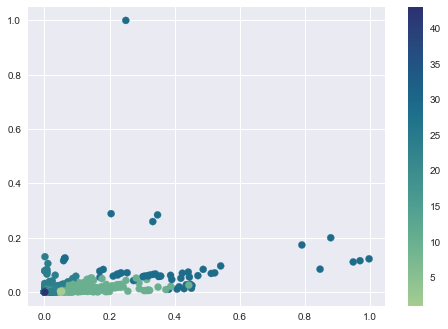

In [58]:
# Visualización de datos con likes en el eje x y dislikes en el eje y

cmap = sns.color_palette("crest", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_predict, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

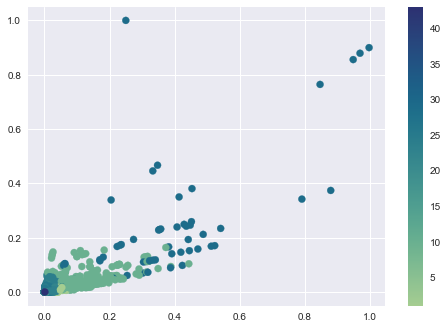

In [59]:
# Visualización de datos con "likes" en el eje x y "comment count" en el eje y

cmap = sns.color_palette("crest", as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 2], c=y_predict, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Por lo cual corremos de nuevo el modelo únicamente con las features de 'likes' y 'comment count' y obtenemos una mejora importante en la métrica de accuracy:

In [60]:
features = datosNormalizadosEstandarizados[['likes', 'comment_count']]
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=7)
model.fit(X_train, y_train.values.ravel())
y_predict = model.predict(X_test)
gnb2 = accuracy_score(y_test, y_predict)
gnb2

0.1068568079703067

# 5. Ejecutar el mismo análisis anterior pero esta vez para un método de ensamble que no se haya visto en clase. Indique ademas, en que consisten los métodos de ensamble y cuáles son sus principales características.

## Algoritmo Ensamble

En el campo del aprendizaje automático, los métodos combinados (métodos de ensemble) utilizan múltiples algoritmos de aprendizaje para obtener un rendimiento predictivo que mejore el que podría obtenerse por medio de cualquiera de los algoritmos de aprendizaje individuales que lo constituyen.


Como ya vimos, los algoritmos de aprendizaje supervisado se describen normalmente como la tarea de buscar a través de un espacio de hipótesis para encontrar la más adecuada que haga buenas predicciones con un problema en particular. En general, esta tarea es muy complicada y, ni siquiera teniendo la certeza de que en el espacio completo existe una buena solución, podemos estar seguros de encontrarla.

La idea de los métodos combinados es considerar múltiples hipótesis simultáneamente para formar una hipótesis que, con suerte (y la ayuda de algunos teoremas esenciales), se comporte mejor. El término de métodos de ensemble se suele reservar para aquellas combinaciones que hacen uso de múltiples hipótesis pertenecientes a una misma familia, mientras que se usa el término más general de sistemas de aprendizaje múltiples cuando las hipótesis que se combinan provienen de diversas familias.

Evidentemente, debido a que los métodos combinados hacen uso de varias hipótesis simultáneas, se produce una elevación en los costes computacionales, por lo que suele ser habitual utilizar algoritmos rápidos como espacio de hipótesis base, como son los árboles de decisión.

Una combinación de algoritmos de aprendizaje supervisado es en si mismo un algoritmo de aprendizaje supervisado y puede ser entrenado y usado para hacer predicciones. Sin embargo, se debe tener en cuenta que una combinación de hipótesis (algoritmos) de una determinada familia no es necesariamente una hipótesis (algoritmo) de la misma familia, por lo que podríamos obtener mejores resultados que con los elementos individuales de la familia, aunque también podemos correr el riesgo de obtener un modelo sobreajustado si no se tienen algunas precauciones. En la práctica, la forma en que se seleccionan los modelos individuales que se combinan hacen uso de algunas técnicas que tienden a reducir los problemas relacionados con el exceso de ajuste de los datos de entrenamiento y mejoran la prediccióm conjunta.

Empíricamente, se ha comprobado que cuando existe una diversidad significativa entre los modelos individuales, las combinaciones tienden a obtener mejores resultados, por lo que muchos de los métodos existentes buscan promover la diversidad entre los modelos que se combinan, y ello provoca a veces que se usen como modelos aquellos que hacen un uso fuerte de la aleatoriedad, en vez de modelos más dirigidos y que funcionan mejor individualmente.

## Tipos de métodos de Ensamble

En general hay varios tipos de métodos de ensamble, sin embargo nos enfocaremos en estos tres de los más populares

### Bootstrap aggregating (bagging)

Cuando usamos bagging, también combinamos varios modelos de machine learning. A diferencia del voto por mayoría, la forma de conseguir que los errores se compensen entre sí, es que cada modelo se entrena con subconjuntos del conjunto de entrenamiento. Estos subconjuntos se forman eligiendo muestras aleatoriamente (con repetición) del conjunto de entrenamiento.

Los resultados se combinan, para problemas de clasificación, igual que hemos visto en la votación por mayoría, con el voto suave para los modelos que den probabilidades. Para problemas de regresión, normalmente se utiliza la media aritmética.


Los bosques aleatorios (random forests), no son ni más ni menos, que un ensemble de árboles de decisión combinados con bagging. Aunque bagging se puede usar con cualquier modelo, la opción de usarlo con árboles de decisión es muy popular por motivos de rendimiento. Normalmente, es muy rápido construir un árbol de decisión.

### Boosting

En el boosting, cada modelo intenta arreglar los errores de los modelos anteriores. Por ejemplo, en el caso de clasificación, el primer modelo tratará de aprender la relación entre los atributos de entrada y el resultado. Seguramente cometerá algunos errores. Así que el segundo modelo intentará reducir estos errores. Esto se consigue dándole más peso a las muestras mal clasificadas y menos peso a las muestras bien clasificadas. Para problemas de regresión, las predicciones con un mayor error cuadrático medio tendrán más peso para el siguiente modelo.

Hay muchas implementaciones de ensembles que usan boosting. El primero fue el AdaBoost. Los más usados actualmente son xgboost, CatBoost y LightGBM.

### Stacking

Cuando hablamos de un ensemble de stacking, nos referimos a que estamos apilando modelos. Cuando apilamos modelos, lo que en realidad estamos haciendo, es usar la salida de varios modelos como la entrada de varios modelos. Por ejemplo, el ganador del Aguathón, «ensambló» varios modelos apilándolos para conseguir un rendimiento mejor. El problema consistía en predecir el nivel del río Ebro a su paso por Zaragoza a 24h, 48h y 72h. César Montenegro usó bosques aleatorios para predecir el nivel del Ebro a 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72 horas y luego uso otro bosque aleatorio que usaba estas predicciones como entrada y predecía el nivel del río a 24h, 48h y 72h. Esta forma de combinar los modelos, sin duda contribuyó a un mejor rendimiento de su solución.

_____
**Referencias:**

***Ensemble learning*** https://urldefense.com/v3/__https://en.wikipedia.org/wiki/Ensemble_learning*Ensemble_theory*5Cn__;IyU!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b379DD1H9s$ 
***Ensembles: voting, bagging, boosting, stacking por Jose Martinez Heras*** 31/05/2019 https://urldefense.com/v3/__https://www.iartificial.net/ensembles-voting-bagging-boosting-stacking/*5Cn__;JQ!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b37E59uMv4$ 
***Métodos combinados de aprendizaje por Fernando Sancho Caparrini*** 26 de Diciembre de 2018 https://urldefense.com/v3/__http://www.cs.us.es/*fsancho/?e=106__;fg!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b37_M5fvw8$ 

Usaremos boosting para aplicar a nuestro data set de Youtube.

Importando las librerías para algoritmo de boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

print(GradientBoostingClassifier())

GradientBoostingClassifier()


In [62]:
#Funcion para imprimir resultados

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        

In [63]:
x_train, x_test, y_train, y_test = train_test_split(featuresNormalizadsEstandarizados.iloc[0:499,0:1], target.iloc[0:499,:], random_state=4)

gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [50, 250, 500],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.1]
#    'n_estimators': [5, 50, 250, 500],
#    'max_depth': [1, 3, 5, 7, 9],
#    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)

cv.fit(x_train, y_train.values.ravel())

print_results(cv)


C:\Users\araygada\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.241 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.262 (+/-0.025) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.262 (+/-0.025) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.238 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.209 (+/-0.101) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.201 (+/-0.141) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.243 (+/-0.053) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.179 (+/-0.087) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.171 (+/-0.068) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.257 (+/-0.03) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.211 (+/-0.072) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
0.198 (+/-0.068) for {'learnin

Ahora procedemos a evaluar el modelo.

In [64]:
y_predict = cv.predict(x_test)

cvAccuracy = accuracy_score(y_test, y_predict)
cvAccuracy

0.296

Para modelo de boosting iniciamos con el full set de datos y mucho más hiperparámetros, sin embargo estuvo corriendo dos días entero y no terminaba de procesar.  Debido al alcance de esta tarea, decidimos reducir la complejidad del set de datos para que por lo menos se pueda ver como ejemplo boosting con nuestro set de datos aunque sea reducido.  Se puede confirmar como la literatura indica, el algoritmo de boosting es bien intensivo de recursos computacionales.

# Conclusión

Cada algoritmo de machine learning tiene sus caracteristícas y pudimos ver que producen diferentes modelos con diferentes resultados.  Lo más importante es entender el problema y las características de los datos para aplicar diferentes algoritmos y probarlos modificando sus parámetros y así poder tomar una mejor decisión a la hora de escoger el que genere mejores predicciones para el problema que se quiere resolver.